### Approach to the problem
* Import required libraries
* Load the Dataset
  * Kaggle link: https://www.kaggle.com/datasets/zalando-research/fashionmnist
* Audit the dataset
* Declaring a Sequential Model (Sequential Layers)
* Declare Layers (Dense, Dropout)
  * Number of Neurons per layer
  * Regularization (L1 & L2)
  * Activation Functions (Relu, tanh and Sigmoid)
  * Shapeof input for the input layer
* Compile the model
  * Optimizer (SGD, ADAM)
  * Lerning Rate
  * Loss Function (Binary CrossEntropy, Categorical CrossEntropy)
  * Metrics (Accuracy, MSE, RMSE, F1-Score, Precision, Recall etc.)
* Fit the model
  * Train data
  * Test / Validation data
  * Epochs
  * Verbose
  * Batch Size
* Evaluation
* Predict
* Model Deployment into UI / Frontend

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Load the data

In [3]:
!unzip '/content/drive/MyDrive/Colab_Notebooks/Fashion_MNIST/fashion_mnist.zip'

Archive:  /content/drive/MyDrive/Colab_Notebooks/Fashion_MNIST/fashion_mnist.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [4]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test = pd.read_csv('/content/fashion-mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **About Dataset**
#### **Context**
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

#### **Content**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

* To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
* For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.



#### **Labels**

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot


TL;DR

- Each row is a separate image
- Column 1 is the class label.
- Remaining columns are pixel numbers (784 total).
- Each value is the darkness of the pixel (1 to 255)


#### **Acknowledgements**
- Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist
- Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/



#### **License**
The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Check specific row's data as image of 28x28 pixels

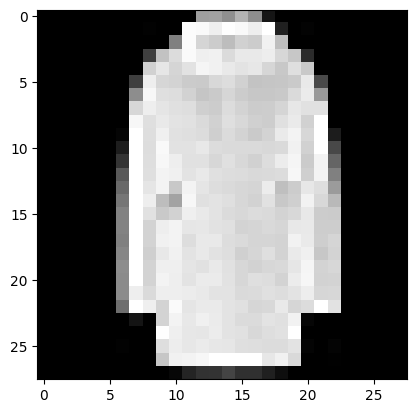

In [6]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(1, 785)]
row_to_examine = 6
image_data = np.reshape(train[features][row_to_examine:row_to_examine+1].to_numpy(), (28, 28))
_ = plt.imshow(image_data, cmap="gray")

Split into X & Y and then into train and test

In [7]:
X = train.drop(['label'], axis = 1)
y = train['label']

Scalling the pixels

In [8]:
X = X/255.    # Added dot at last to convert into the fload data in the range of 0 to 1
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


Train test split using sklearn

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print(f"X_train shape = {X_train.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (48000, 784)
X_test shape = (12000, 784)
y_train shape = (48000,)
y_test shape = (12000,)


transform Y into One Hot Encode using the "to_categorical" Function

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f"y_train shape = {y_train.shape}")
print(f"y_test shape = {y_test.shape}")

y_train shape = (48000, 10)
y_test shape = (12000, 10)


Declare the Model (Sequential) & Layers
Compile
Fit
Evaluate
Predict

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
1500/1500 - 7s - loss: 0.5106 - accuracy: 0.8161 - val_loss: 0.4328 - val_accuracy: 0.8373 - 7s/epoch - 5ms/step
Epoch 2/100
1500/1500 -

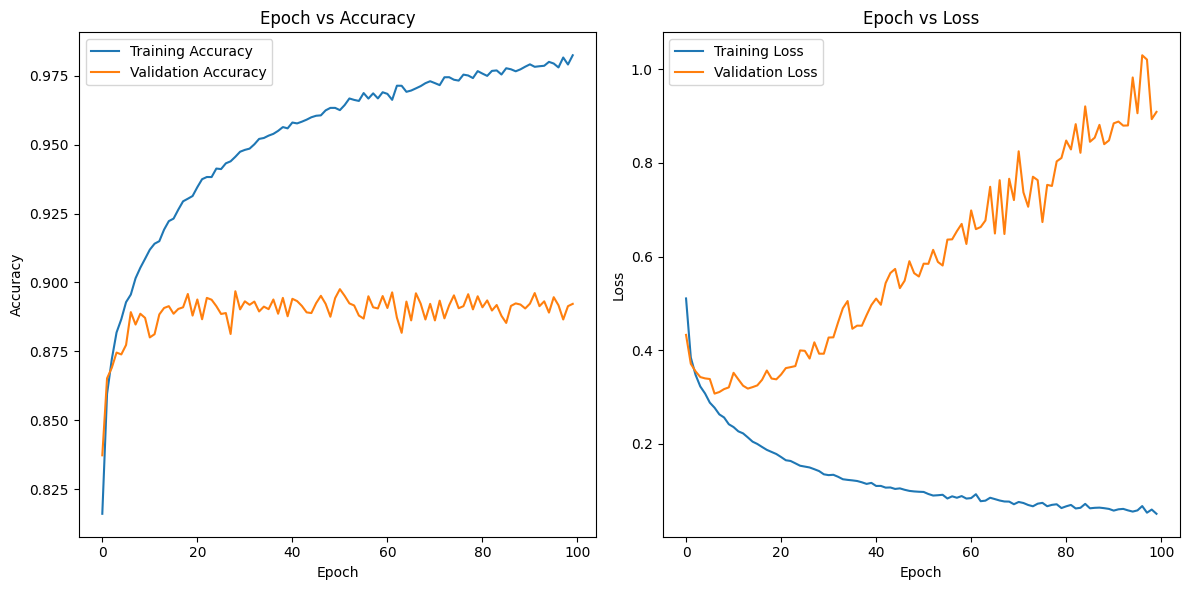

In [11]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim=784))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=2)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax1.plot(hist.history['accuracy'])
ax1.plot(hist.history['val_accuracy'])
ax1.legend(['Training Accuracy', 'Validation Accuracy'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Epoch vs Accuracy')

ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.legend(['Training Loss', 'Validation Loss'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Epoch vs Loss')

# Prevent the axis labels from slightly overlapping
fig.tight_layout()

y_train_actual = np.argmax(y_train, axis=1)
y_test_actual = np.argmax(y_test, axis=1)

y_preds_train = np.argmax(model.predict(X_train), axis=1)
y_preds_test = np.argmax(model.predict(X_test), axis=1)

print("\nTraining dataset ->")
print("\n                 -: Confusion Matrix :-\n")
print(confusion_matrix(y_train_actual, y_preds_train))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_train_actual, y_preds_train))
print("\nTesting dataset ->")
print("\n            -: Confusion Matrix :-\n")
print(confusion_matrix(y_test_actual, y_preds_test))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_test_actual, y_preds_test))

Add with the Dropout layers

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

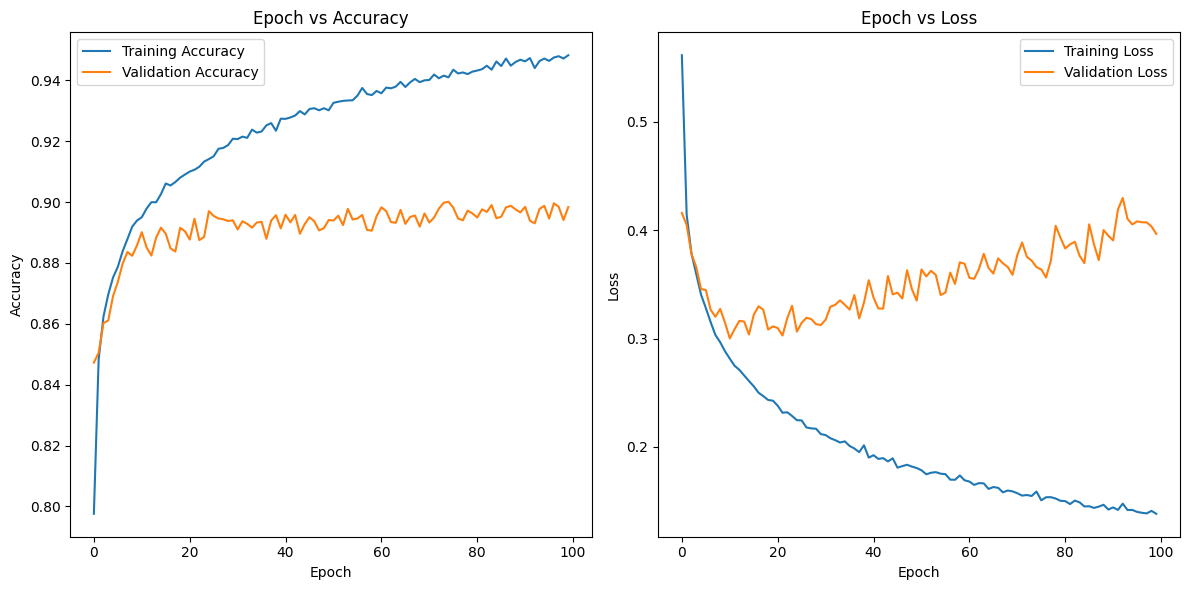

In [12]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim=784))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax'))
model.summary()

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=2)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax1.plot(hist.history['accuracy'])
ax1.plot(hist.history['val_accuracy'])
ax1.legend(['Training Accuracy', 'Validation Accuracy'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Epoch vs Accuracy')

ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.legend(['Training Loss', 'Validation Loss'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Epoch vs Loss')

fig.tight_layout()


y_train_actual = np.argmax(y_train, axis=1)
y_test_actual = np.argmax(y_test, axis=1)

y_preds_train = np.argmax(model.predict(X_train), axis=1)
y_preds_test = np.argmax(model.predict(X_test), axis=1)

print("\nTraining dataset ->")
print("\n                 -: Confusion Matrix :-\n")
print(confusion_matrix(y_train_actual, y_preds_train))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_train_actual, y_preds_train))
print("\nTesting dataset ->")
print("\n            -: Confusion Matrix :-\n")
print(confusion_matrix(y_test_actual, y_preds_test))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_test_actual, y_preds_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 256)              

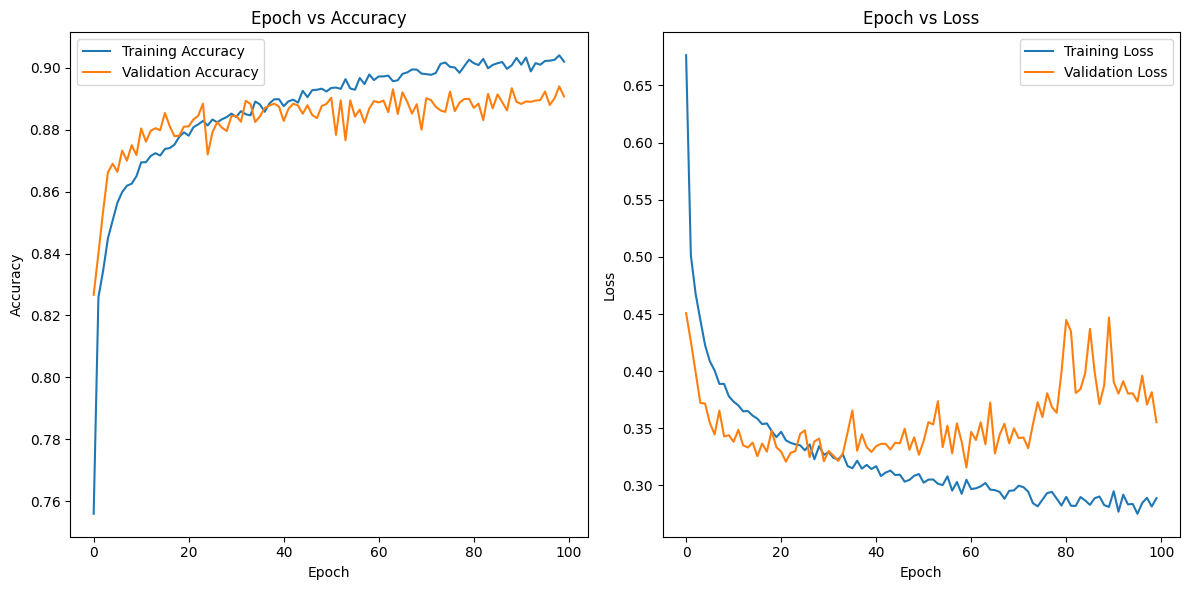

In [13]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim=784))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))
model.summary()

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=2)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax1.plot(hist.history['accuracy'])
ax1.plot(hist.history['val_accuracy'])
ax1.legend(['Training Accuracy', 'Validation Accuracy'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Epoch vs Accuracy')

ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.legend(['Training Loss', 'Validation Loss'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Epoch vs Loss')

fig.tight_layout()


y_train_actual = np.argmax(y_train, axis=1)
y_test_actual = np.argmax(y_test, axis=1)

y_preds_train = np.argmax(model.predict(X_train), axis=1)
y_preds_test = np.argmax(model.predict(X_test), axis=1)

print("\nTraining dataset ->")
print("\n                 -: Confusion Matrix :-\n")
print(confusion_matrix(y_train_actual, y_preds_train))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_train_actual, y_preds_train))
print("\nTesting dataset ->")
print("\n            -: Confusion Matrix :-\n")
print(confusion_matrix(y_test_actual, y_preds_test))
print("\n                  -: Classification Report :-\n")
print(classification_report(y_test_actual, y_preds_test))

Save the model as file

In [14]:
!pip install pickle-mixin

  Preparing metadata (setup.py) ... done
  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-py3-none-any.whl size=5990 sha256=9a883a285bc542a356ec322e28f6d6c75af335755c4f30db96386f8a6c77be37
  Stored in directory: /root/.cache/pip/wheels/3e/c6/e9/d1b0a34e1efc6c3ec9c086623972c6de6317faddb2af0a619c
Successfully built pickle-mixin


In [15]:
import pickle

file_name = 'finalized_model.pkl'
pickle.dump(model, open(file_name, 'wb'))

Load the model from disk

In [16]:
loaded_model = pickle.load(open('finalized_model.pkl', 'rb'))
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 256)              